In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import matplotlib.pyplot as plt 
import os 
from sklearn.linear_model import LinearRegression
from statistics import mean
from sklearn import preprocessing as prep



data_path = "D:\\Kaggle\\PulmonaryFibrosisProgression"
data_set = pd.read_csv(data_path + "\\train.csv")


In [111]:
data_set.iloc[1544]

Patient          ID00426637202313170790466
Weeks                                   13
FVC                                   2712
Percent                            66.5946
Age                                     73
Sex                                   Male
SmokingStatus                            2
Name: 1544, dtype: object

### Categorical encoding the Smoking Status
Label Encoding performed as follows:<br>
0  <-- Currently Smoking <br>
1  <-- Ex-Smoker <br>
2  <-- Never Smoked  <br>

In [2]:
labelEnconder = prep.LabelEncoder()
oneHotEncoder = prep.OneHotEncoder()

data_set['SmokingStatus'] = labelEnconder.fit_transform(data_set['SmokingStatus'])
data_set.head()



,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,1
1,ID00007637202177411956430,5,2214,55.712129,79,Male,1
2,ID00007637202177411956430,7,2061,51.862104,79,Male,1
3,ID00007637202177411956430,9,2144,53.950679,79,Male,1
4,ID00007637202177411956430,11,2069,52.063412,79,Male,1


In [35]:
patient_db = pd.DataFrame()

patient_db = data_set.drop_duplicates(subset = 'Patient').drop(['FVC', 'Percent' ], axis=1)
print("Number of unique patient data: ", len(patient_db))

patient_db.head()

Number of unique patient data:  176


,Patient,Weeks,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,79,Male,1
9,ID00009637202177434476278,8,69,Male,1
18,ID00010637202177584971671,0,60,Male,1
27,ID00011637202177653955184,6,72,Male,1
36,ID00012637202177665765362,33,65,Male,2


In [18]:
#Checking for null enteries in database
data_set[data_set.isnull().any(axis=1)].head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus


In [102]:
#Grouping Data by Patient ID for easy sorting

grp = data_set.copy().groupby(['Patient'])

patient_db["test_count"] = grp["FVC"].count().reset_index()["FVC"]

# patient_db[patient_db['test_count'].isnull()]  #Checking if counting is done properly
patient_db

,Patient,Weeks,Age,Sex,SmokingStatus,test_count
0,ID00007637202177411956430,-4,79,Male,1,9
1,ID00009637202177434476278,8,69,Male,1,9
2,ID00010637202177584971671,0,60,Male,1,9
3,ID00011637202177653955184,6,72,Male,1,9
4,ID00012637202177665765362,33,65,Male,2,9
...,...,...,...,...,...,...
171,ID00419637202311204720264,6,73,Male,1,9
172,ID00421637202311550012437,15,68,Male,1,10
173,ID00422637202311677017371,6,73,Male,1,8
174,ID00423637202312137826377,17,72,Male,1,9


In [21]:
print(patient_db.describe())

test_count
count  176.000000
mean     8.801136
std      0.650449
min      6.000000
25%      9.000000
50%      9.000000
75%      9.000000
max     10.000000


In [95]:
data_set.loc[data_set['Patient'] == 'ID00165637202237320314458']

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
616,ID00165637202237320314458,79,2102,53.803624,54,Male,1
617,ID00165637202237320314458,81,2102,53.803624,54,Male,1
618,ID00165637202237320314458,83,2172,55.595372,54,Male,1
619,ID00165637202237320314458,85,2136,54.673902,54,Male,1
620,ID00165637202237320314458,87,2067,52.907751,54,Male,1
621,ID00165637202237320314458,92,2161,55.313812,54,Male,1
622,ID00165637202237320314458,104,2296,58.769325,54,Male,1
623,ID00165637202237320314458,117,2129,54.494727,54,Male,1
624,ID00165637202237320314458,133,2184,55.902529,54,Male,1


In [86]:
# sns.set(rc={'figure.figsize':(20,10 )})

# f, ax = plt.subplots(figsize = [20,10])

def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

bfl = []

for id, d in grp:
    bfl.append(best_fit_slope(d.Weeks, d.FVC))

patient_db["rate_of_decent"] = bfl

patient_db.head()
patient_db.describe()
    # ax = sns.regplot (x="Weeks", y="FVC", data = d)


,test_count,rate_of_decent
count,176.000000,176.000000
mean,8.801136,-4.524301
std,0.650449,6.135490
min,6.000000,-28.182575
25%,9.000000,-7.588524
50%,9.000000,-3.909110
75%,9.000000,-0.950083
max,10.000000,14.682612


### Histogram to denote the density of available records per patient

<AxesSubplot:xlabel='test_count', ylabel='Density'>

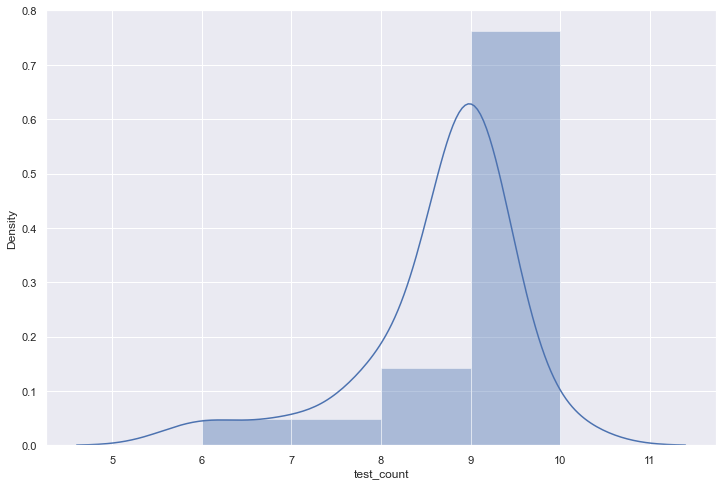

In [39]:
sns.distplot(patient_db['test_count'])  

### Identifying the average deviation of first FVC reading from the date of scan

[[]]

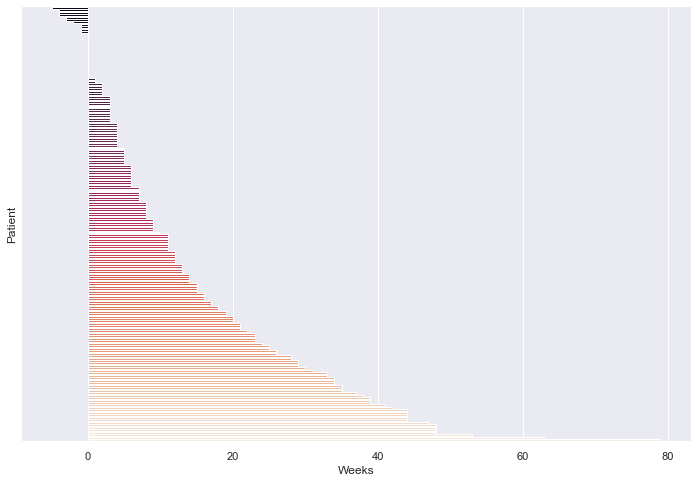

In [107]:
ax = sns.barplot(x='Weeks',y='Patient', data=patient_db.sort_values('Weeks'), palette="rocket")
ax.set(yticks= [])
